In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('G:\\Business Analytics\\World Happiness Data 2021\\world-happiness-report-2021.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [98]:
print('Our Dataset has total:' ,data.shape[0],'rows and', data.shape[1],'columns'  )

Our Dataset has total: 149 rows and 9 columns


##### We are taking specific columns

In [4]:
data_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
data_columns

['Country name',
 'Regional indicator',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [5]:
data = data[data_columns].copy()

In [6]:
data.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


##### Renaming

In [7]:
happy_df = data.rename(columns={'Country name':'country_name' , 'Regional indicator':'regional_indicator' , 'Ladder score':'happiness_score' , 'Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'})

In [8]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [9]:
happy_df.isna().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

### Plot Between Hapiness Score and GDP

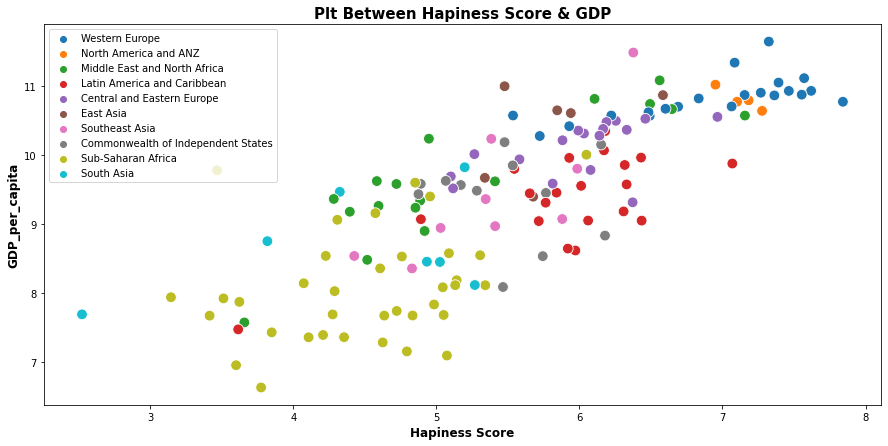

In [11]:
plt.figure(figsize=(15,7))
plt.title('Plt Between Hapiness Score & GDP' , fontweight = 'bold' , fontsize = 15)
sns.scatterplot(x = happy_df.happiness_score , y = happy_df.logged_GDP_per_capita , data=happy_df , hue=happy_df.regional_indicator , s = 115)
plt.legend(loc = 'upper left' , fontsize=10)
plt.xlabel('Hapiness Score' , fontsize=12 , fontweight='bold')
plt.ylabel('GDP_per_capita', fontsize=12 , fontweight='bold')
#sns.set_style('darkgrid')
plt.rcParams['figure.facecolor']='#FFE5B4'
plt.show()

### As we can see that Happiness Score and Logged GDP has a strong positive Correlation (0.7897)
### More the happier people GDP will be higher

In [12]:
happy_df.corr()

,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
logged_GDP_per_capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
social_support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
healthy_life_expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
freedom_to_make_life_choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
perceptions_of_corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


## Pie Plot GDP by Region

In [14]:
gdp_region = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

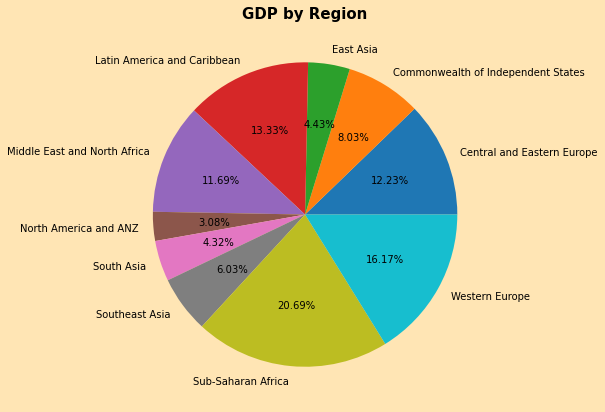

In [15]:
plt.figure(figsize=(15,7))
gdp_region.plot.pie(autopct='%.2f%%')
plt.ylabel("")
plt.title('GDP by Region' , fontsize = 15 , fontweight = 'bold')
plt.show()

In [16]:
# Total number of countries in each region

total_countries = happy_df.groupby('regional_indicator')['country_name'].count()
total_countries

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

##### Correlation Map

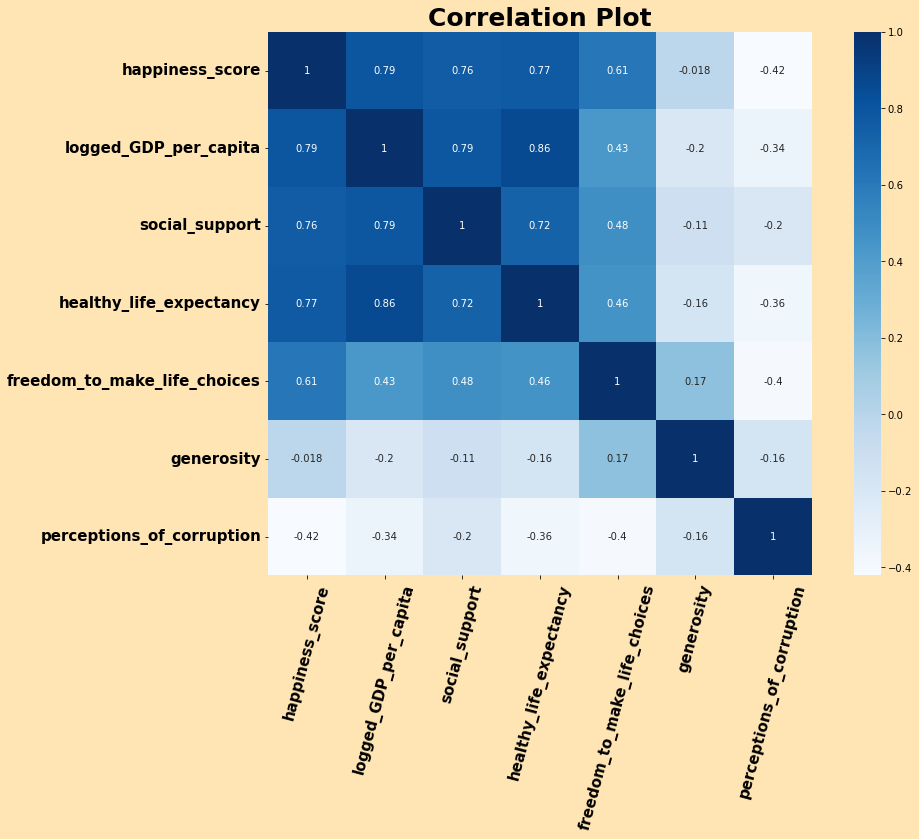

In [20]:
cor = happy_df.corr(method='pearson')
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap='Blues' , square=True , ax=ax)
plt.xticks(rotation=75 , fontsize = 15 , fontweight='bold')
plt.yticks(fontsize = 15 , fontweight='bold')
plt.title('Correlation Plot',fontsize = 25 , fontweight='bold')
plt.show()

## Corruption in regions

In [35]:
corruptions = happy_df.groupby('regional_indicator')['perceptions_of_corruption'].mean().sort_values(ascending=False)
corruptions

regional_indicator
Central and Eastern Europe            0.850529
South Asia                            0.797429
Latin America and Caribbean           0.792600
Sub-Saharan Africa                    0.765944
Middle East and North Africa          0.762235
Commonwealth of Independent States    0.725083
Southeast Asia                        0.709111
East Asia                             0.683333
Western Europe                        0.523095
North America and ANZ                 0.449250
Name: perceptions_of_corruption, dtype: float64

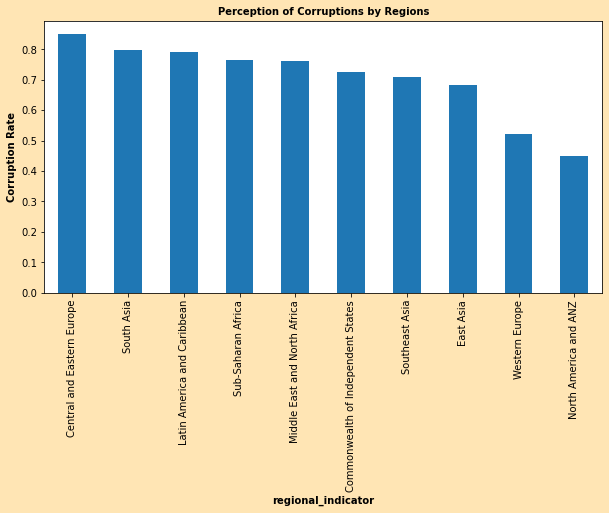

In [36]:
plt.figure(figsize=(10,5))
plt.title('Perception of Corruptions by Regions',fontsize=10,fontweight='bold')
plt.xlabel('Regions',fontsize=10,fontweight='bold')
plt.ylabel('Corruption Rate',fontsize=10,fontweight='bold')
corruptions.plot.bar()
plt.show()

## Life expentancy of top 10 countries

In [58]:
top10 = happy_df.head(10).sort_values(by='healthy_life_expectancy' , ascending=False)
bottom10 = happy_df.tail(10).sort_values(by='healthy_life_expectancy' , ascending=True)

In [59]:
top10

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242
5,Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270
9,Austria,Western Europe,7.268,10.906,0.934,73.3,0.908,0.042,0.481
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
6,Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186


In [72]:
bottom10

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729
141,Tanzania,Sub-Saharan Africa,3.623,7.876,0.702,57.999,0.833,0.183,0.577
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167


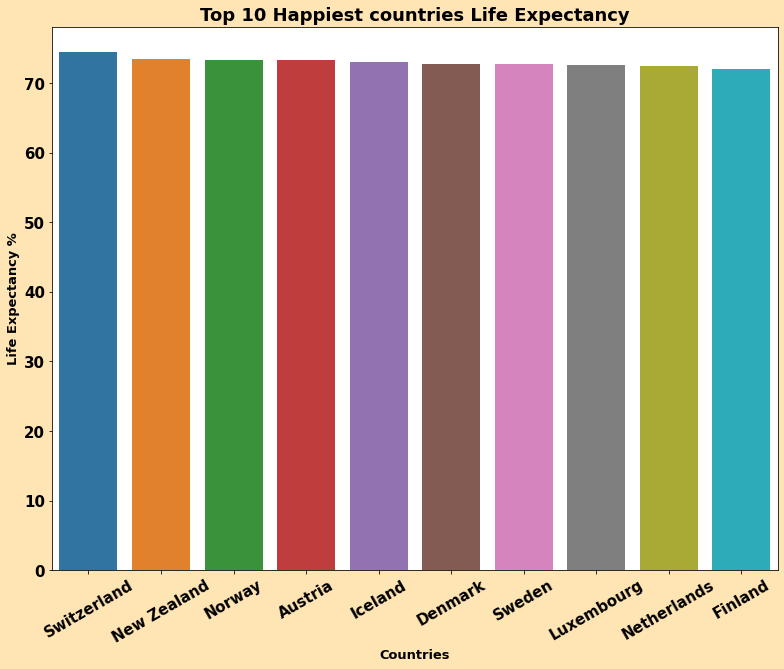

In [82]:
plt.figure(figsize=(13,10))
sns.barplot(x = top10['country_name'].head(10), y= top10['healthy_life_expectancy'].head(10).sort_values(ascending=False))
#sns.barplot(x = happy_df['country_name'].head(10), y = happy_df['healthy_life_expectancy'].head(10).sort_values(ascending=False) )
plt.title('Top 10 Happiest countries Life Expectancy',fontweight='bold',fontsize=18)
plt.xlabel('Countries',fontweight='bold',fontsize=13)
plt.ylabel('Life Expectancy %',fontweight='bold',fontsize=13)
plt.xticks(rotation=30,fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold',fontsize=15)
plt.show()

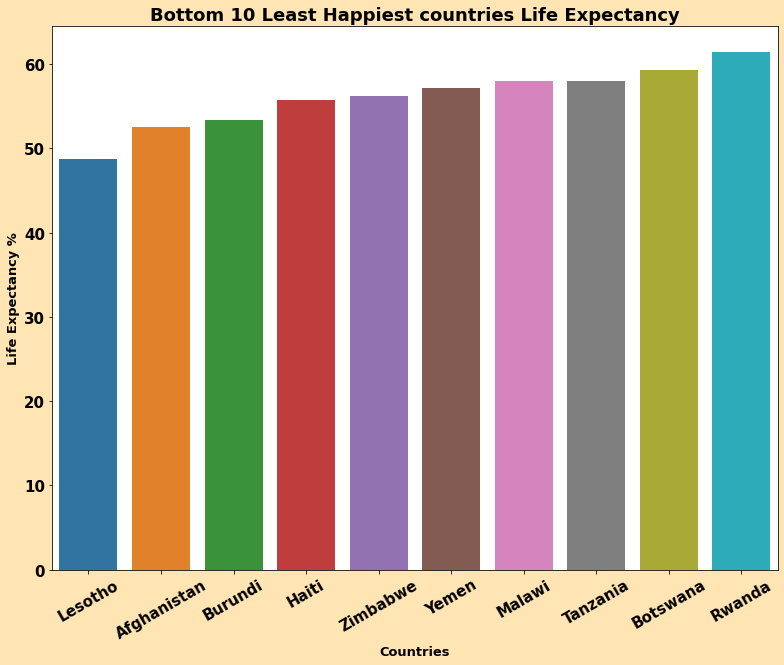

In [83]:
plt.figure(figsize=(13,10))
sns.barplot(x = bottom10['country_name'].tail(10) , y = bottom10['healthy_life_expectancy'].tail(10).sort_values(ascending=True))
plt.title('Bottom 10 Least Happiest countries Life Expectancy',fontweight='bold',fontsize=18)
plt.xlabel('Countries',fontweight='bold',fontsize=13)
plt.ylabel('Life Expectancy %',fontweight='bold',fontsize=13)
plt.xticks(rotation=30,fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold',fontsize=15)
plt.show()

### Plot between Freedom to make life choices and Hapiness Score 

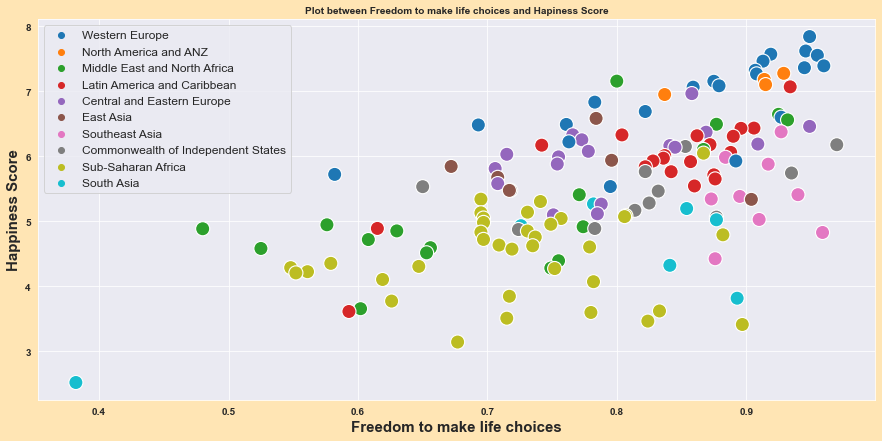

In [207]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = happy_df.freedom_to_make_life_choices , y = happy_df.happiness_score , hue=happy_df.regional_indicator, s=200)
plt.title('Plot between Freedom to make life choices and Hapiness Score' , fontsize=10,fontweight='bold')
plt.legend(loc='upper left' ,fontsize=12)
plt.xlabel('Freedom to make life choices' , fontsize=15,fontweight='bold')
plt.ylabel('Happiness Score' , fontsize=15,fontweight='bold')
plt.xticks( fontsize=10,fontweight='bold')
plt.yticks( fontsize=10,fontweight='bold')
plt.show()

In [84]:
happy_df.corr()

,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
logged_GDP_per_capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
social_support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
healthy_life_expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
freedom_to_make_life_choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
perceptions_of_corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


## Freedom to make life choices vs Happiness Score (0.6077) 
### More the people to have freedom happier they are. 

### Top 10 Least corrupt countries

In [90]:
top_10_least_corrupt_countries = happy_df.sort_values(by='perceptions_of_corruption' , ascending=True).head(10)
top_10_least_corrupt_countries

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
31,Singapore,Southeast Asia,6.377,11.488,0.915,76.953,0.927,-0.018,0.082
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.400,0.929,0.134,0.242
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
14,Ireland,Western Europe,7.085,11.342,0.947,72.400,0.879,0.077,0.363


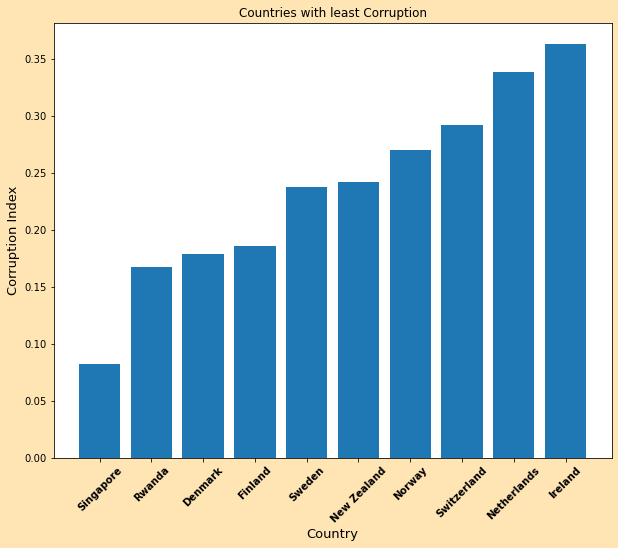

In [91]:
plt.figure(figsize=(10,8))
plt.title('Countries with least Corruption')
plt.xlabel('Country' , fontsize=13)
plt.ylabel('Corruption Index' , fontsize=13)
plt.xticks(rotation=45 , fontsize=10,fontweight='bold')
plt.bar(top_10_least_corrupt_countries.country_name , top_10_least_corrupt_countries.perceptions_of_corruption)
plt.show()

### Top 10 Most Corrupt countries

In [92]:
top_10_most_corrupt_countries = happy_df.sort_values(by='perceptions_of_corruption' , ascending=False).head(10)
top_10_most_corrupt_countries

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
59,Croatia,Central and Eastern Europe,5.882,10.217,0.924,70.799,0.754,-0.118,0.939
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938
87,Bulgaria,Central and Eastern Europe,5.266,10.016,0.931,67.000,0.788,-0.096,0.932
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,9.590,0.870,68.098,0.706,0.113,0.931
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
109,Ukraine,Commonwealth of Independent States,4.875,9.436,0.888,64.902,0.724,-0.011,0.924
64,Moldova,Commonwealth of Independent States,5.766,9.454,0.857,65.699,0.822,-0.079,0.918
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911


<BarContainer object of 10 artists>

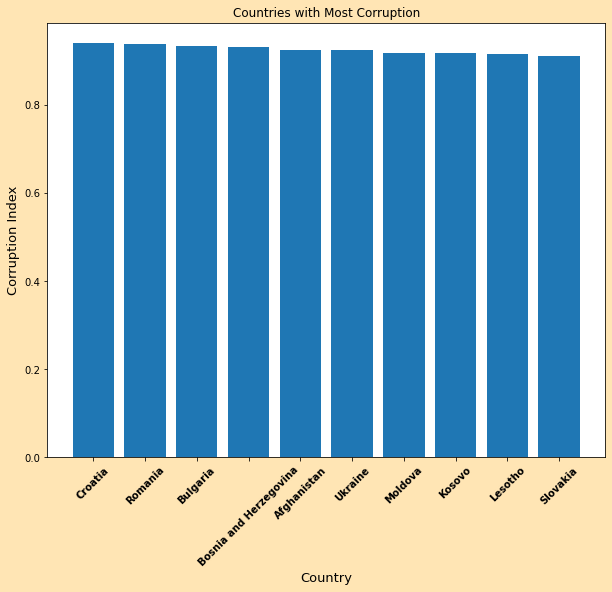

In [93]:
plt.figure(figsize=(10,8))
plt.title('Countries with Most Corruption')
plt.xlabel('Country' , fontsize=13)
plt.ylabel('Corruption Index' , fontsize=13)
plt.xticks(rotation=45 , fontsize=10,fontweight='bold')
plt.bar(top_10_most_corrupt_countries.country_name , top_10_most_corrupt_countries.perceptions_of_corruption)

### Scatter Plot Corruption and happiness score

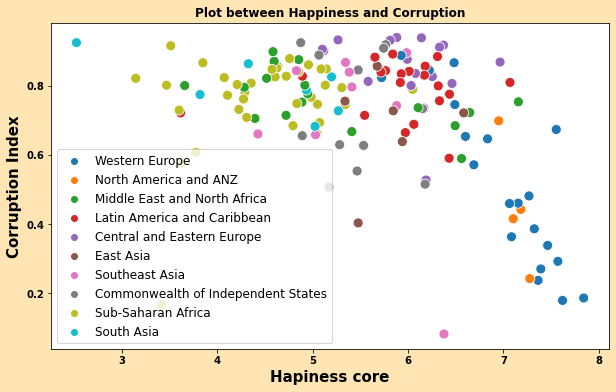

In [96]:
plt.figure(figsize=(10,6))
plt.title('Plot between Happiness and Corruption',fontweight='bold')
plt.xlabel('Hapiness core' , fontsize=15,fontweight='bold')
plt.ylabel('Corruption Index' , fontsize=15 , fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
sns.scatterplot(x=happy_df.happiness_score , y = happy_df.perceptions_of_corruption , hue = happy_df.regional_indicator,s=100)
plt.legend(loc='lower left' , fontsize=12)
plt.show()

In [94]:
happy_df.corr()

,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
logged_GDP_per_capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
social_support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
healthy_life_expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
freedom_to_make_life_choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
perceptions_of_corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


### As we can see that happieness Score and corruption (-0.4211)
### Negative Correlation More the COrruption less the happiness Score
